# **Primer laboratorio de Spark**

# Descargar e instalar Spark en colab
  *  https://archive.apache.org/dist/spark/spark-3.2.3/spark-3.2.3-bin-hadoop3.2.tgz
  * ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  * ["SPARK_HOME"] = "/content/spark-3.2.3-bin-hadoop3.2"

### 1. Instalara SDK de java 8






In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/ull

2. Descargar Spark 3.2.2.

In [2]:
!wget -q  https://archive.apache.org/dist/spark/spark-3.2.3/spark-3.2.3-bin-hadoop3.2.tgz

In [3]:
# descompremir la version de spark
!tar xf spark-3.2.3-bin-hadoop3.2.tgz

In [4]:
# establecer las variables de entornos
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.3-bin-hadoop3.2"

In [5]:
# Instalar la librería findspark
!pip install -q findspark

In [6]:
# Instalar pyspark
!pip install -q pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [7]:
### verificar la instalación ### CON esto podemos crear una sesion de spark
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()


In [8]:

spark = SparkSession.builder.master("local[*]").getOrCreate()

In [9]:
# Probando la sesión de Spark
df = spark.createDataFrame([{'hola':'mundo'}for x in range(10)])

In [10]:
df.show(10,False)

+-----+
|hola |
+-----+
|mundo|
|mundo|
|mundo|
|mundo|
|mundo|
|mundo|
|mundo|
|mundo|
|mundo|
|mundo|
+-----+



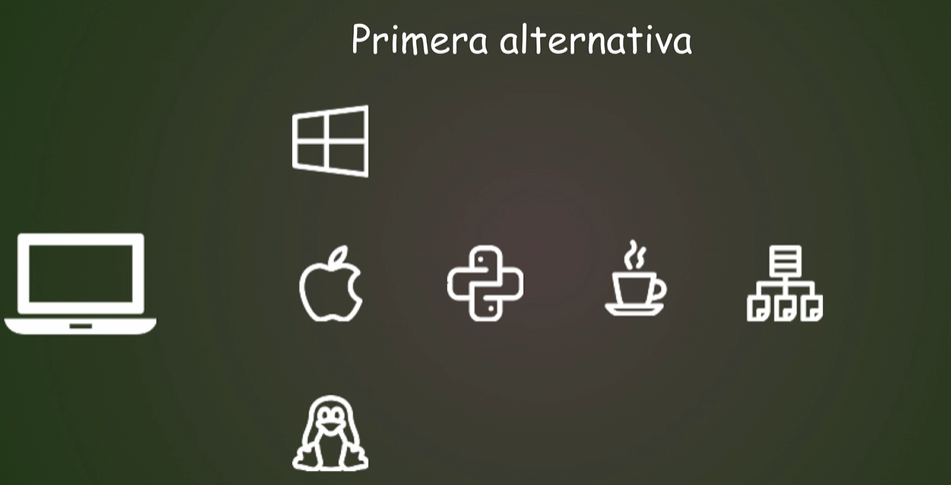

# ventajas
 * facil de acceso
 * ejecutar  spark en cualquier dispositivo
 * trabajra en equipo
# Dsvetajas
 * no se guardan las configuraciones
 * escalabilidad

# **Introduccion a RDD en Spark**

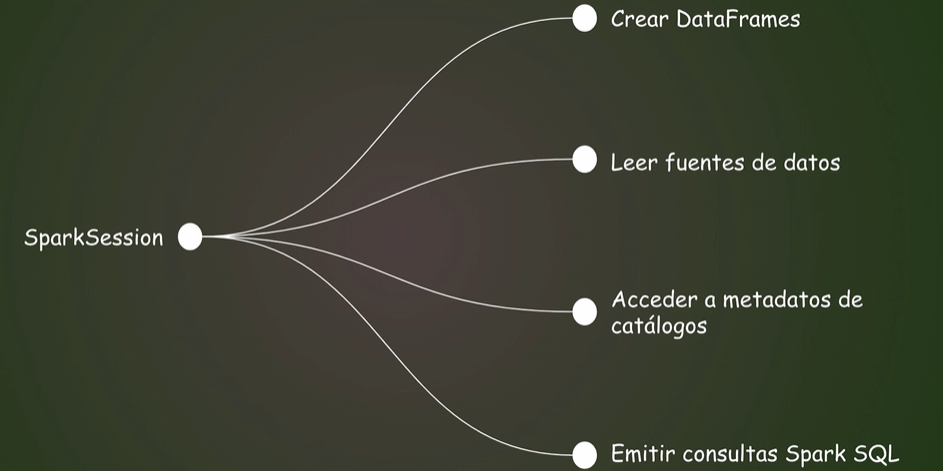

# **SparkSession**

In [11]:
#la forma mas sencilla de crear spark session
spark = SparkSession.builder.getOrCreate()
spark


In [12]:
# local si es con todo los cores es *
spark = SparkSession.builder.master("local[*]").appName('Curso Pyspark').getOrCreate()

In [13]:
spark

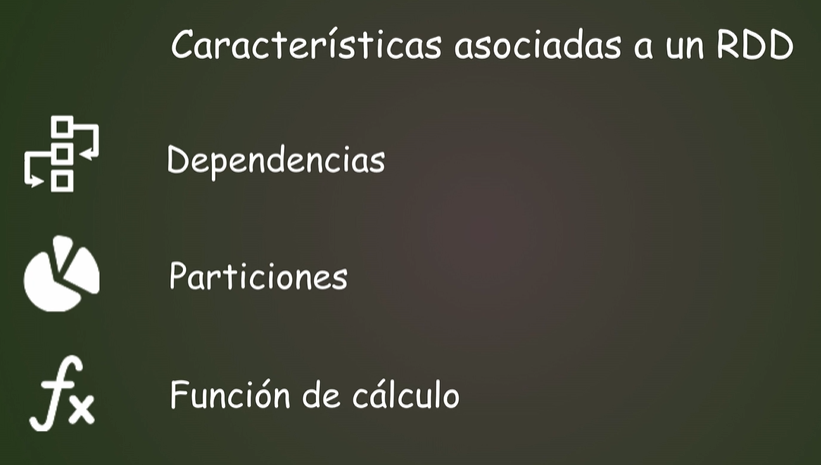

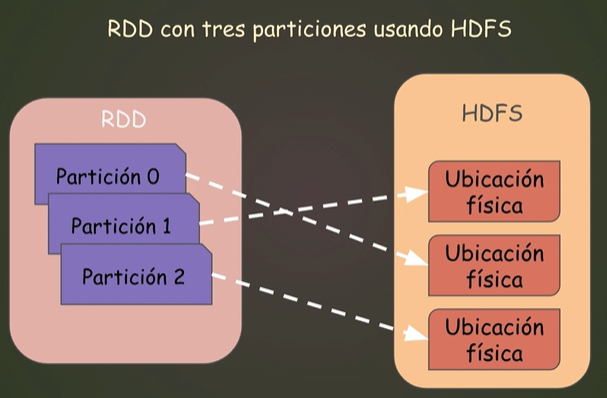

# **Diferentes formas de crear RDD**

In [14]:
# RDD
import findspark
findspark.init()
from pyspark.sql import SparkSession

In [15]:
spark = SparkSession.builder.getOrCreate()

In [16]:
sc = spark.sparkContext

In [17]:
# Crear un RDD vacío
rdd_vacio = sc.emptyRDD

In [18]:
# Crear un RDD con parallelize
rdd_vacio3 = sc.parallelize([],3)
rdd_vacio3.getNumPartitions()


3

In [19]:
rdd = sc.parallelize([1,2,3,4,5])
rdd

ParallelCollectionRDD[8] at readRDDFromFile at PythonRDD.scala:274

In [20]:
rdd.collect()

[1, 2, 3, 4, 5]

# Crear un RDD desde un archivo de texto

In [21]:
rdd_texto = sc.textFile('./rdd_source.txt')
rdd_texto.collect()

['Así podemos crear', 'un RDD desde un', 'archivo de texto!!!']

In [22]:
# leer
rdd_texto_completo = sc.wholeTextFiles('./rdd_source.txt')
rdd_texto_completo.collect()

[('file:/content/rdd_source.txt',
  'Así podemos crear\nun RDD desde un\narchivo de texto!!!')]

In [23]:
rdd_suma = rdd.map(lambda x: x +1)

In [24]:
rdd_suma.collect()

[2, 3, 4, 5, 6]

In [25]:
df = spark.createDataFrame([(1,'jose'),(2, 'juan') ], ['id', 'nombre'])

In [26]:
df.show()

+---+------+
| id|nombre|
+---+------+
|  1|  jose|
|  2|  juan|
+---+------+



In [27]:
rdd_df =df.rdd
rdd_df.collect()

[Row(id=1, nombre='jose'), Row(id=2, nombre='juan')]

# TRANSFORMACIONES EN RDD
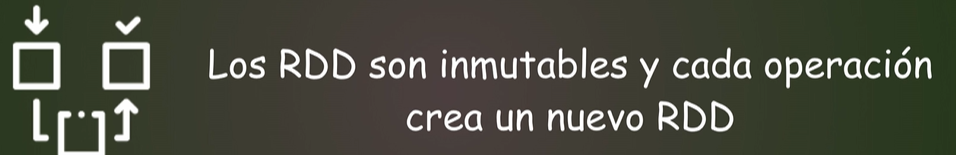

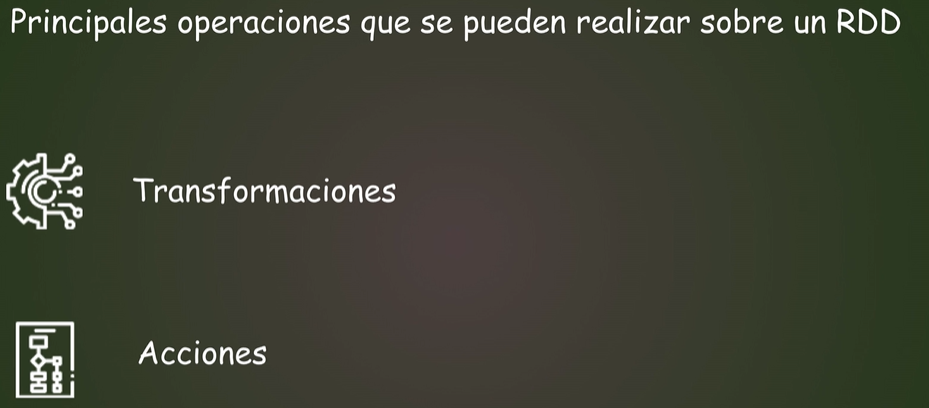

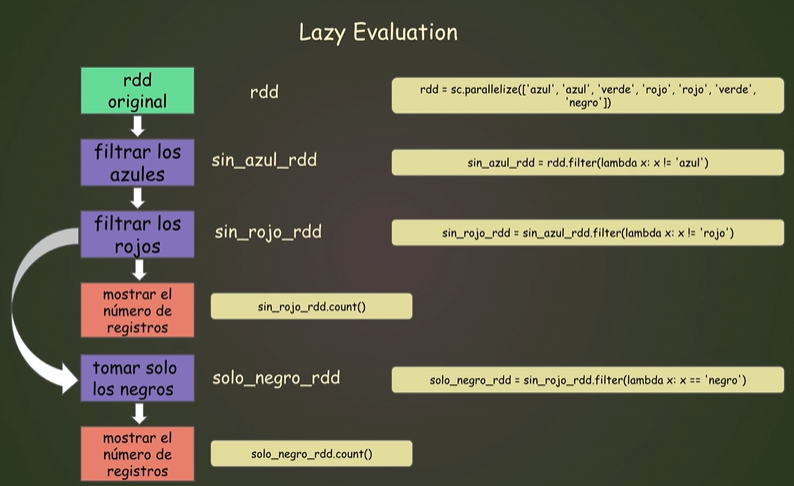

# **Tipo de Transformaciones**

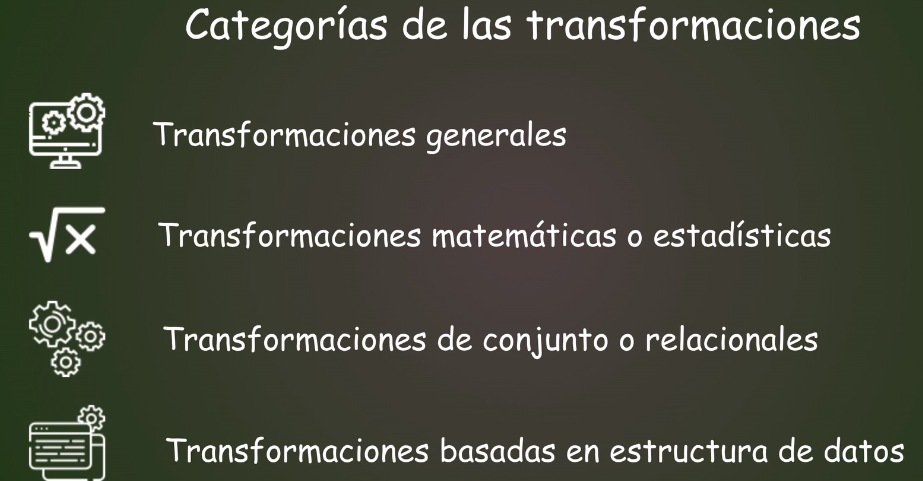

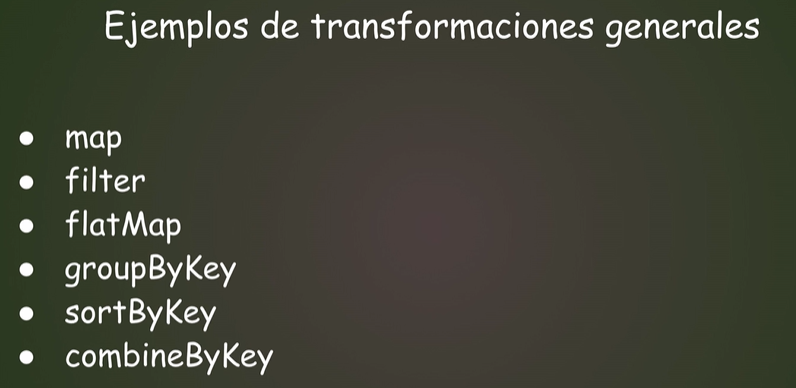

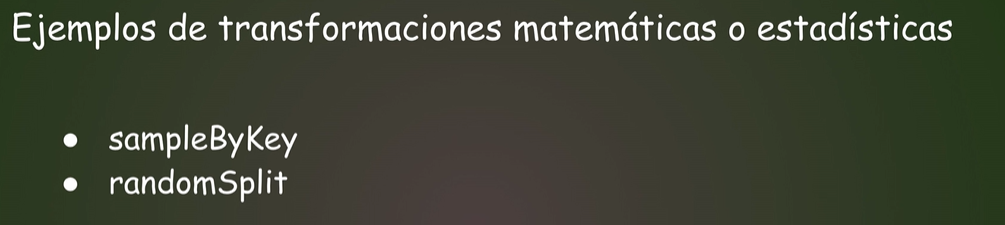

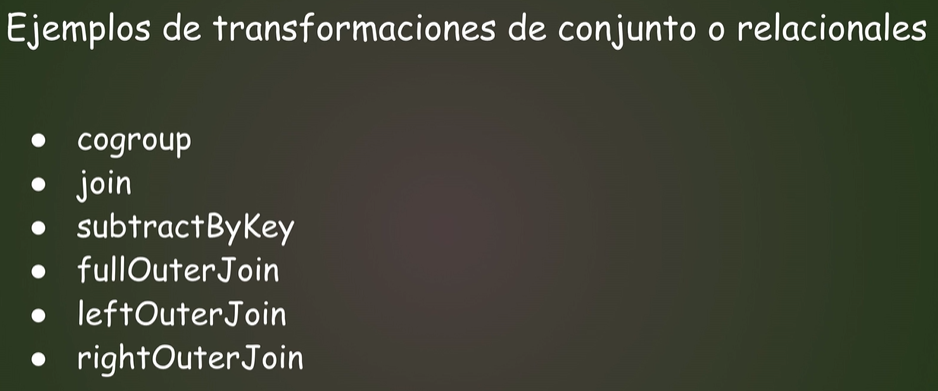

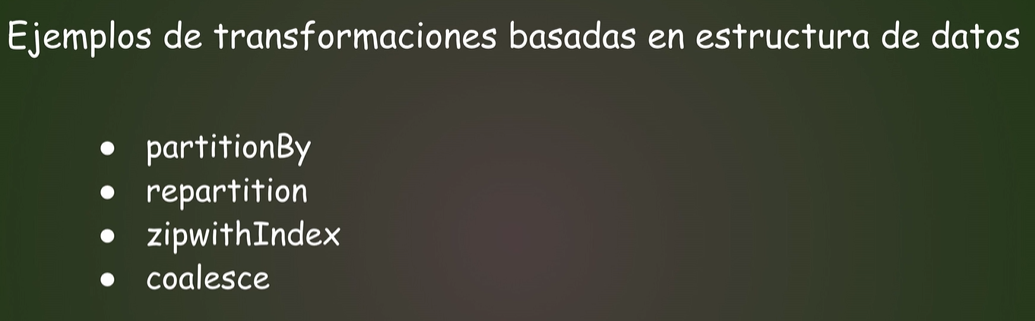

# Funcion map

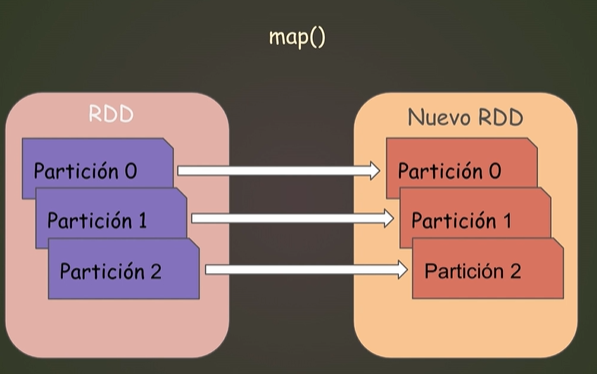

In [28]:
#  Transformaciones: función map
import numpy as np
import pandas as pd
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [29]:
sc = spark.sparkContext

In [30]:
rdd = sc.parallelize([1,2,3,4,5])

In [31]:
rdd_resta = rdd.map(lambda x: x-1)  # lambda se conoce como funcion anonima
rdd_resta.collect()

[0, 1, 2, 3, 4]

In [32]:
rdd_par = rdd.map(lambda x: x%2==0)
rdd_par.collect()

[False, True, False, True, False]

In [33]:
#creamos un RDD de texto
rdd_text = sc.parallelize(['jose', 'juan', 'max'])

In [34]:
rdd_mayuscula = rdd_text.map(lambda x: x.upper())
rdd_mayuscula.collect()

['JOSE', 'JUAN', 'MAX']

In [35]:
rdd_hola = rdd_text.map(lambda x: 'Hola ' + x)
rdd_hola.collect()

['Hola jose', 'Hola juan', 'Hola max']

# ** Transformacion: Funcion FlatMap**

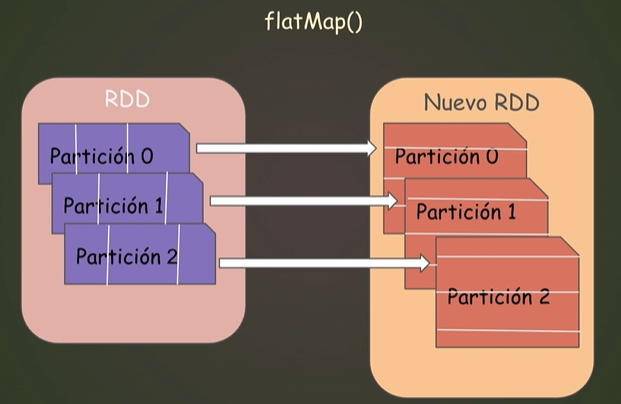

In [36]:
# Transformaciones: función flatMap

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext


In [37]:
rdd = sc.parallelize([1,2,3,4,5])

In [38]:
rdd_cuadrado = rdd.map(lambda x: (x, x ** 2))

rdd_cuadrado.collect()


[(1, 1), (2, 4), (3, 9), (4, 16), (5, 25)]

In [39]:
#aqui fatmap nos da una lista unica una lista plana no una tupla como la funcion map por eso se llama flaten
rdd_cuadrado_flat = rdd.flatMap(lambda x: (x, x ** 2))
rdd_cuadrado_flat.collect()


[1, 1, 2, 4, 3, 9, 4, 16, 5, 25]

In [40]:
# aqui vemos una sola lista
rdd_texto = sc.parallelize(['jose', 'juan', 'lucia'])

rdd_mayuscula = rdd_texto.flatMap(lambda x: (x, x.upper()))

rdd_mayuscula.collect()

['jose', 'JOSE', 'juan', 'JUAN', 'lucia', 'LUCIA']

#Transormacion: Funcion Filter


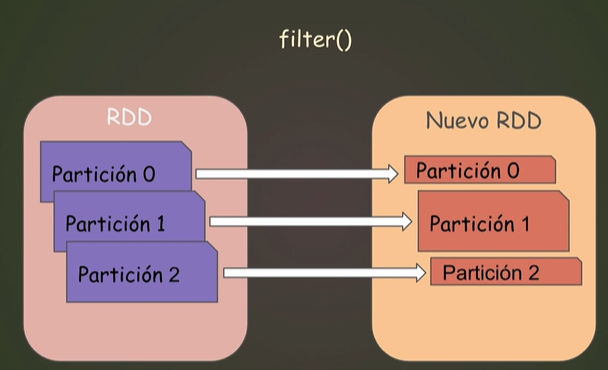

In [45]:
# Transformaciones: función filter

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [46]:
# generamos un RDD de numeros
rdd = sc.parallelize([1,2,3,4,5,6,7,8,9])

In [48]:
rdd_par = rdd.filter(lambda x: x % 2 == 0)

rdd_par.collect()


[2, 4, 6, 8]

In [49]:
rdd_impar = rdd.filter(lambda x: x % 2 != 0)

rdd_impar.collect()

[1, 3, 5, 7, 9]

In [52]:
rdd_texto = sc.parallelize(['jose', 'juaquin', 'juan', 'lucia', 'karla', 'katia'])

rdd_k = rdd_texto.filter(lambda x: x.startswith('k'))
rdd_k.collect()

['karla', 'katia']

In [55]:
rdd_filtro = rdd_texto.filter(lambda x: x.startswith('j') and x.find('u') == 1)

rdd_filtro.collect()

['juaquin', 'juan']

# Transfomaciones: Función coalesce

aplica las transformaciones a las particiones de entrada.

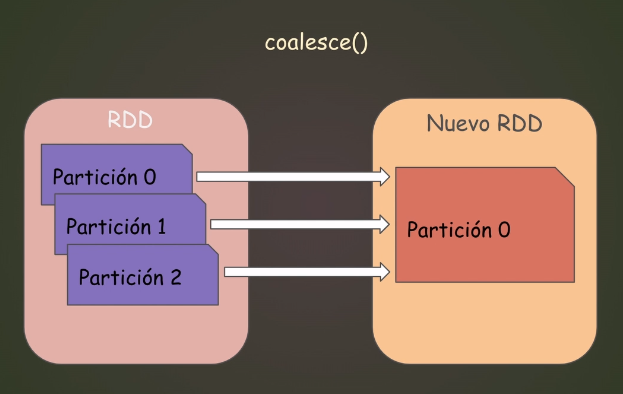

In [56]:
# Transformaciones: función coalesce

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [57]:
# aqui con 10 particion
rdd = sc.parallelize([1,2,3.4,5], 10)

In [58]:
rdd.getNumPartitions()

10

In [62]:
# que pasa si queremos que sea una particion de 5, pero como vemos dice particion 10 aqui vemos que RDD es inmutable
rdd.coalesce(5)
rdd.getNumPartitions()

10

In [60]:
# la forma correcta de hacer la particion es asi
rdd5 = rdd.coalesce(5)

In [61]:
#si queremos revisar la particion lo vemos asi
rdd5.getNumPartitions()

5

# Transformaciones: función repartition
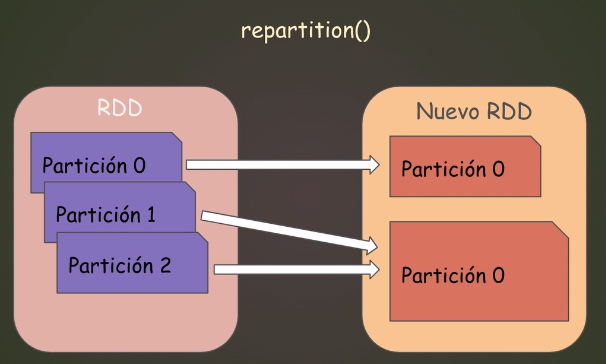

In [64]:
# Transformaciones: función repartition

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [65]:
rdd = sc.parallelize([1,2,3,4,5], 3)

In [66]:
rdd.getNumPartitions()

3

In [67]:
rdd7 = rdd.repartition(7)

In [68]:
rdd7.getNumPartitions()

7

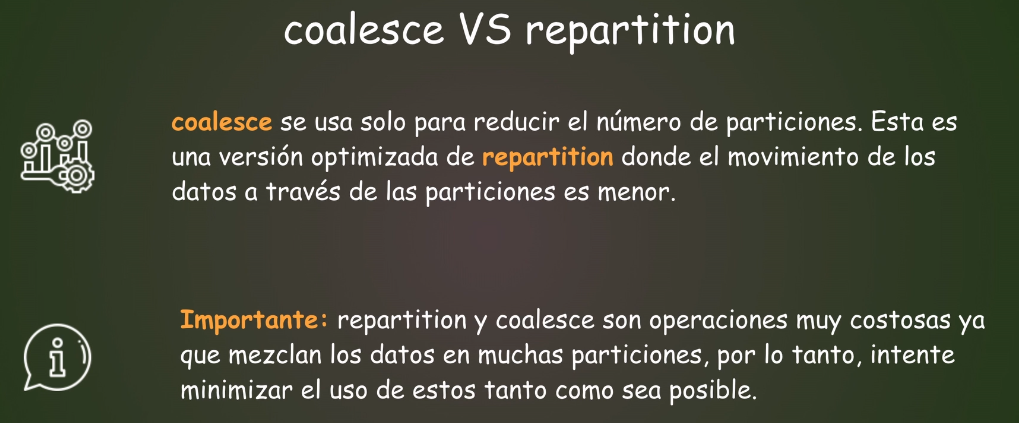

# Transformaciones: función reduceByKey

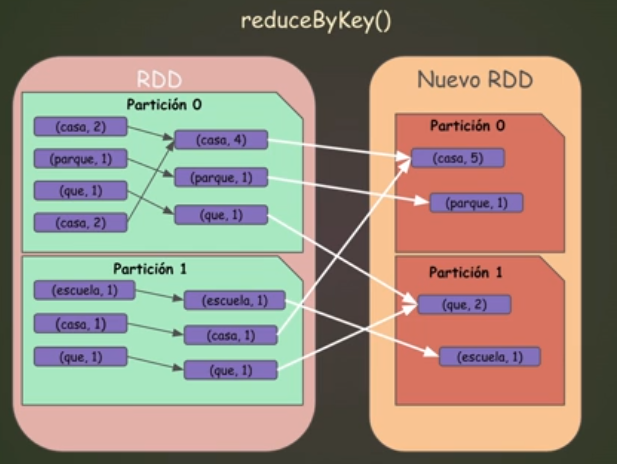

In [69]:
# Transformaciones: función reduceByKey

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [70]:
rdd = sc.parallelize(
    [('casa', 2),
     ('parque', 1),
     ('que', 5),
     ('casa', 1),
     ('escuela', 2),
     ('casa', 1),
     ('que', 1)]
)


In [71]:
rdd.collect()

[('casa', 2),
 ('parque', 1),
 ('que', 5),
 ('casa', 1),
 ('escuela', 2),
 ('casa', 1),
 ('que', 1)]

In [72]:
rdd_reduciodo = rdd.reduceByKey(lambda x,y: x + y)

rdd_reduciodo.collect()

[('parque', 1), ('que', 6), ('casa', 4), ('escuela', 2)]